In [240]:
import numpy as np
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
# Load dataset, using different encoding due to non printable ascii characters

df = pd.read_csv('./datasets/spotify-2023.csv', encoding="latin")

# Test if dataset is loaded
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# Exploring the Data

1. Display information about dataset

In [242]:
# Display info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    object
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    ob

- From this, we can tell that there are null values, which we will later remove

In [243]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,2.669118,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,6.038152,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,0.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


# Cleaning the dataset

1. The dataset contains some empty values. We will drop all rows that contain any empty values. 

In [244]:
# Drops values that are empty

df.dropna(axis=0, how='any', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            816 non-null    object
 1   artist(s)_name        816 non-null    object
 2   artist_count          816 non-null    int64 
 3   released_year         816 non-null    int64 
 4   released_month        816 non-null    int64 
 5   released_day          816 non-null    int64 
 6   in_spotify_playlists  816 non-null    int64 
 7   in_spotify_charts     816 non-null    int64 
 8   streams               816 non-null    int64 
 9   in_apple_playlists    816 non-null    int64 
 10  in_apple_charts       816 non-null    int64 
 11  in_deezer_playlists   816 non-null    object
 12  in_deezer_charts      816 non-null    int64 
 13  in_shazam_charts      816 non-null    object
 14  bpm                   816 non-null    int64 
 15  key                   816 non-null    object


2. Some integers contain ",". We will remove all "," within the dataset so the strings can be converted to integers properly.

In [245]:
target_columns = ["in_deezer_playlists", "in_shazam_charts"]

print(df["in_shazam_charts"].iloc[12])

for column in target_columns:
    df[column] = df[column].apply(lambda x: x.replace(",", ""))

print(df["in_shazam_charts"].iloc[12])

1,281
1281


3. We choose to sum up chart appearances and playlists appearances into their individual columns

In [246]:
def combine_columns(data: pd.DataFrame, result: str, targets: list):
    data[result] = data[targets].astype(int).sum(axis=1)
    for target in targets:
        data.drop(target, axis=1, inplace=True)

combine_columns(df, "in_charts", ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts'])
combine_columns(df, "in_playlists", ['in_spotify_playlists','in_apple_playlists','in_deezer_playlists'])

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,streams,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,in_charts,in_playlists
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,141381703,826,125,B,Major,80,89,83,31,0,8,4,420,641
1,LALA,Myke Towers,1,2023,3,23,133716286,382,92,C#,Major,71,61,74,7,0,10,4,188,1580
2,vampire,Olivia Rodrigo,1,2023,6,30,140003974,949,138,F,Major,51,32,53,17,0,31,6,334,1582
3,Cruel Summer,Taylor Swift,1,2019,8,23,800840817,548,170,A,Major,55,58,72,11,0,11,15,319,8099
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,303236322,425,144,A,Minor,65,23,80,14,63,11,6,198,3304


# Data Visualisation

1. Plotting Correlation Matrix. This tells us which vairables are correlated to each other so we can further plot other graphs.

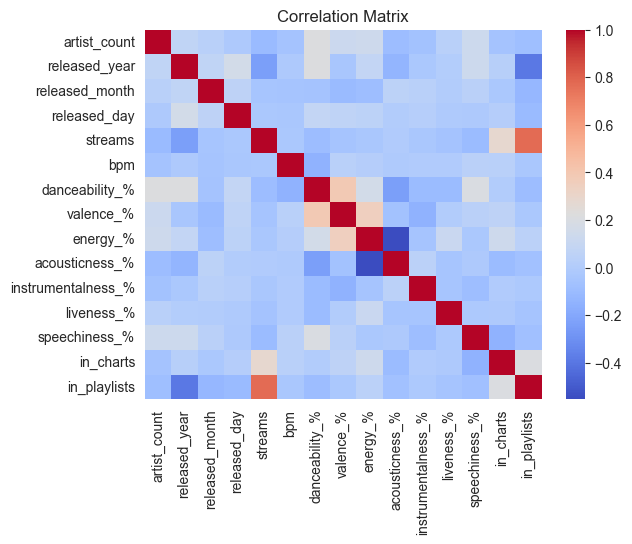

In [247]:
# Plot a correlation matrix

cmatrix = df.corr(numeric_only=True)

sns.heatmap(cmatrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

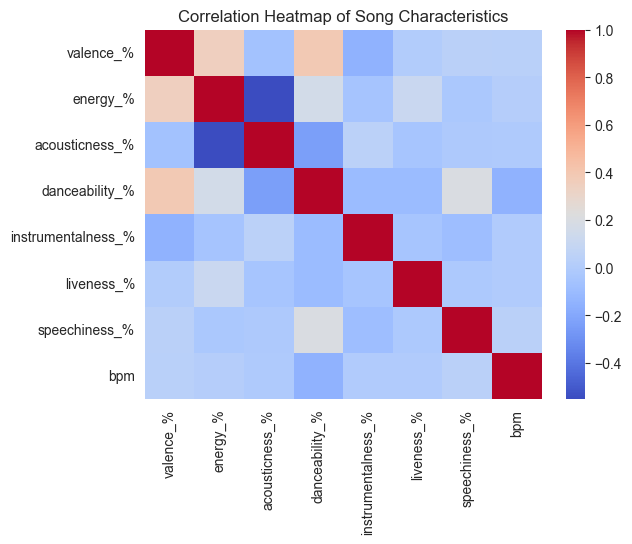

In [248]:
# Plot a correlation matrix of song characteristics
features = df[['valence_%', 'energy_%', 'acousticness_%', 'danceability_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm']]

cmatrix = features.corr()

sns.heatmap(cmatrix, cmap='coolwarm')
plt.title('Correlation Heatmap of Song Characteristics')
plt.show()


2. Plotting Scatter Plots. This allows us to observe trends between two variables

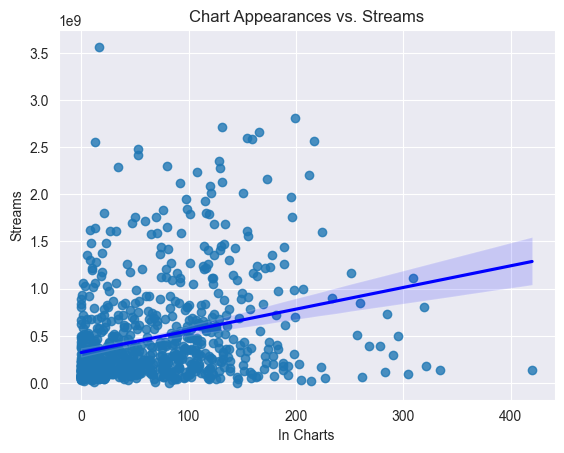

In [249]:
# Plot scatterplot of streams against chart appearances, as well as a best fit line to represent the trend

sns.regplot(data=df, x='in_charts', y='streams', line_kws={'color': 'blue'})
plt.xlabel('In Charts')
plt.ylabel('Streams')
plt.title('Chart Appearances vs. Streams')
plt.show()

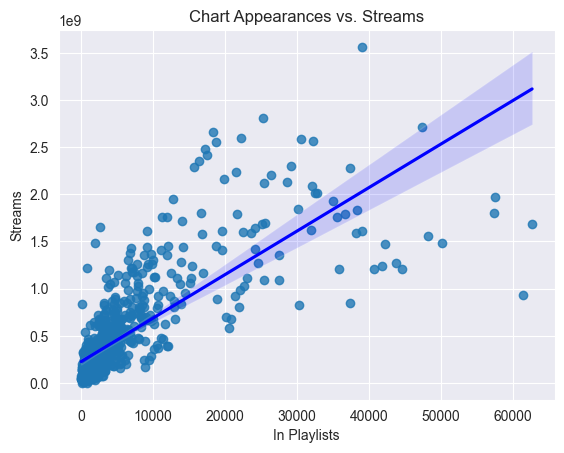

In [250]:
# Plot scatterplot of streams against playlist appearances, as well as a best fit line to represent the trend

sns.regplot(data=df, x='in_playlists', y='streams', line_kws={'color': 'blue'})
plt.xlabel('In Playlists')
plt.ylabel('Streams')
plt.title('Chart Appearances vs. Streams')
plt.show()

This proves that number of **streams** is directly proportional to **chart appearances**, as well as **playlist appearances**

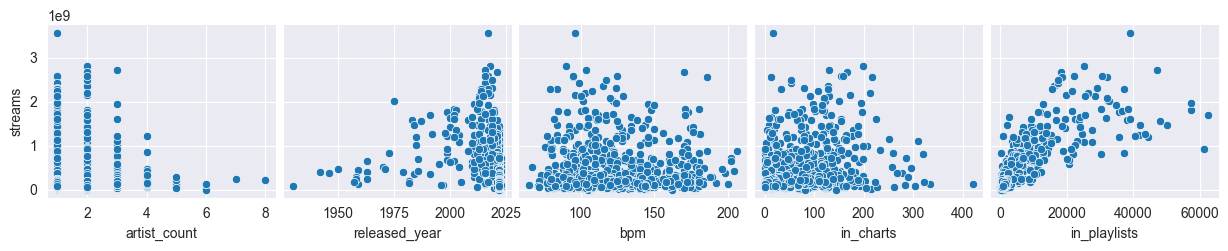

In [251]:
columns = ['artist_count', 'released_year', 'bpm', 'in_charts', 'in_playlists']

sns.pairplot(df, x_vars = columns, y_vars = ['streams'])

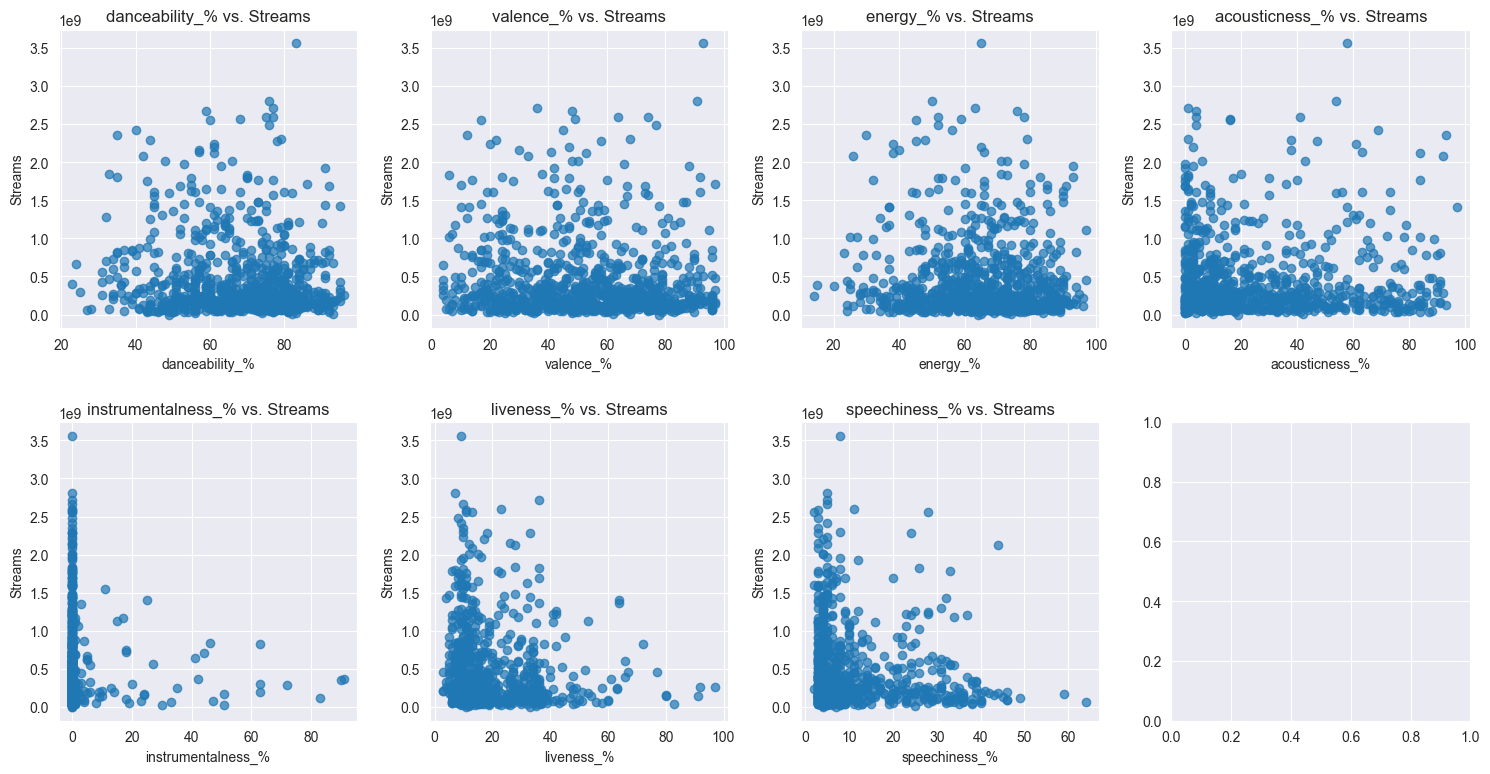

In [252]:
# Plot % against streams

features_to_plot = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(2, 4, figsize=(15,8))

for i, feature in enumerate(features_to_plot):
   col, row = divmod(i, 4)
   axes[col, row].scatter(df[feature], df['streams'], alpha=0.7)
   axes[col, row].set_xlabel(feature)
   axes[col, row].set_ylabel('Streams')
   axes[col, row].set_title(f'{feature} vs. Streams')
   axes[col, row].grid(True)

plt.tight_layout()
plt.show()

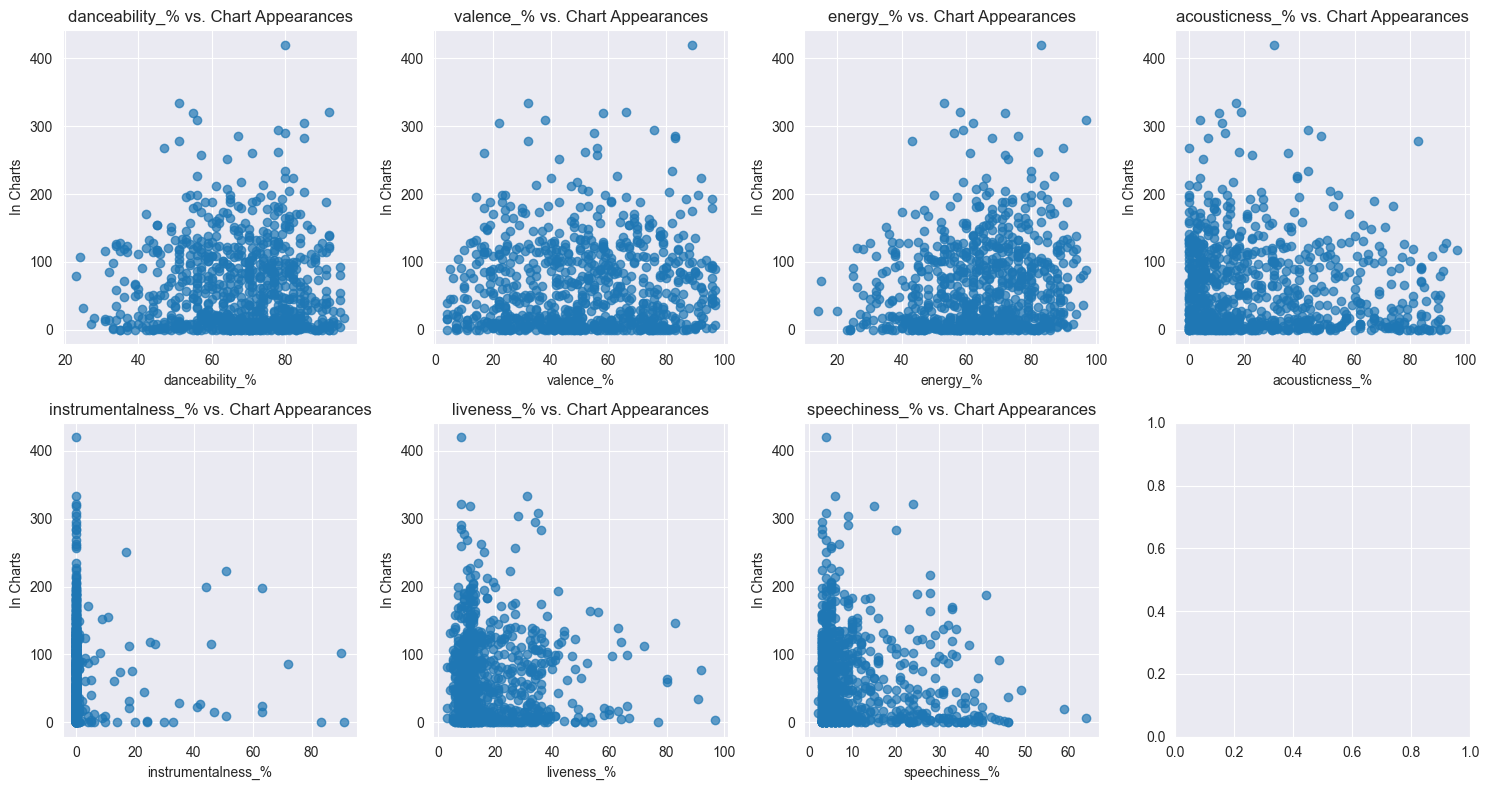

In [253]:
# Plot % against chart appearances

features_to_plot = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(2, 4, figsize=(15,8))

for i, feature in enumerate(features_to_plot):
   col, row = divmod(i, 4)
   axes[col, row].scatter(df[feature], df['in_charts'], alpha=0.7)
   axes[col, row].set_xlabel(feature)
   axes[col, row].set_ylabel('In Charts')
   axes[col, row].set_title(f'{feature} vs. Chart Appearances')
   axes[col, row].grid(True)

plt.tight_layout()
plt.show()

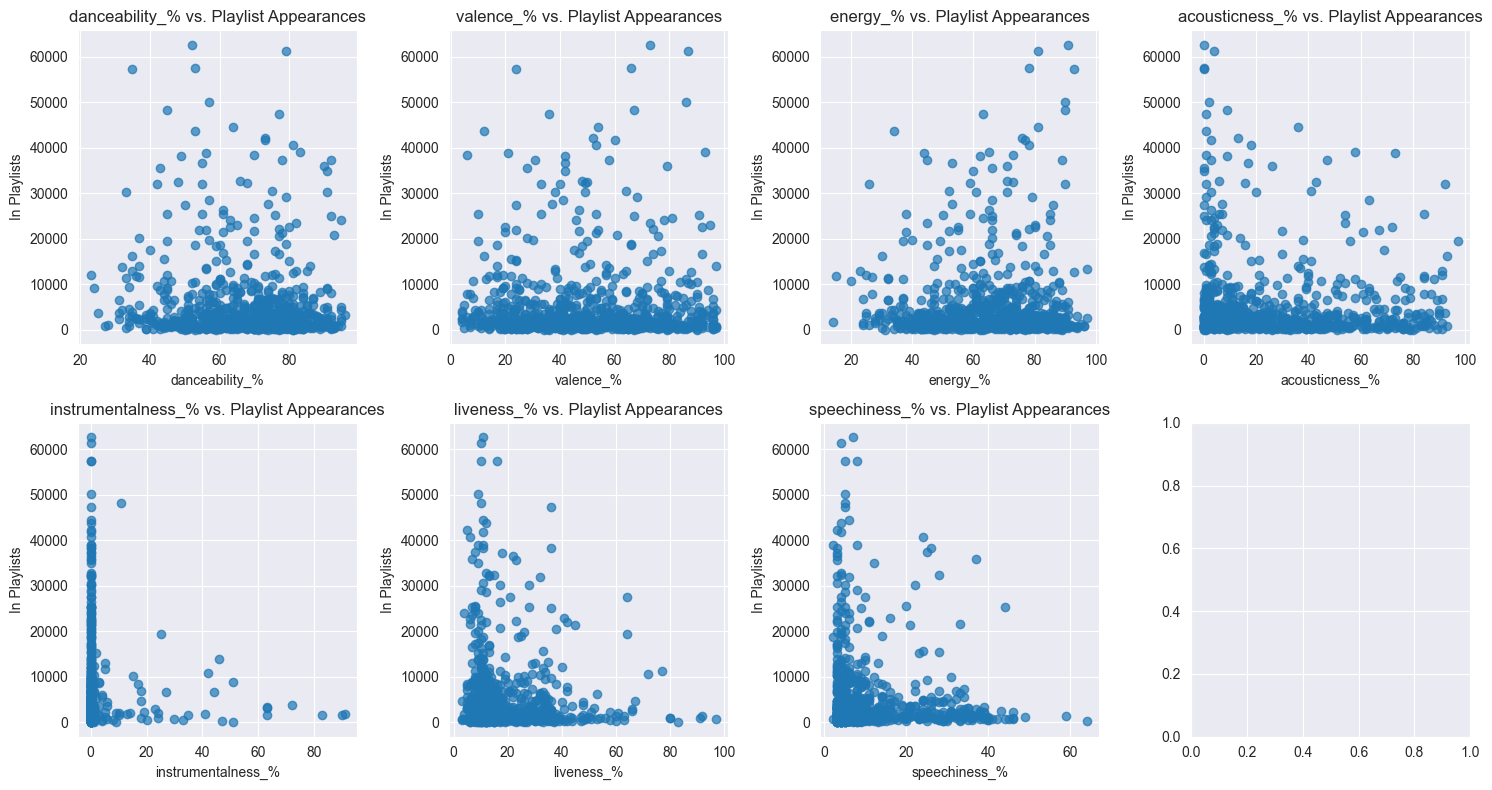

In [254]:
# Plot % against playlist appearances

features_to_plot = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(2, 4, figsize=(15,8))

for i, feature in enumerate(features_to_plot):
   col, row = divmod(i, 4)
   axes[col, row].scatter(df[feature], df['in_playlists'], alpha=0.7)
   axes[col, row].set_xlabel(feature)
   axes[col, row].set_ylabel('In Playlists')
   axes[col, row].set_title(f'{feature} vs. Playlist Appearances')
   axes[col, row].grid(True)

plt.tight_layout()
plt.show()

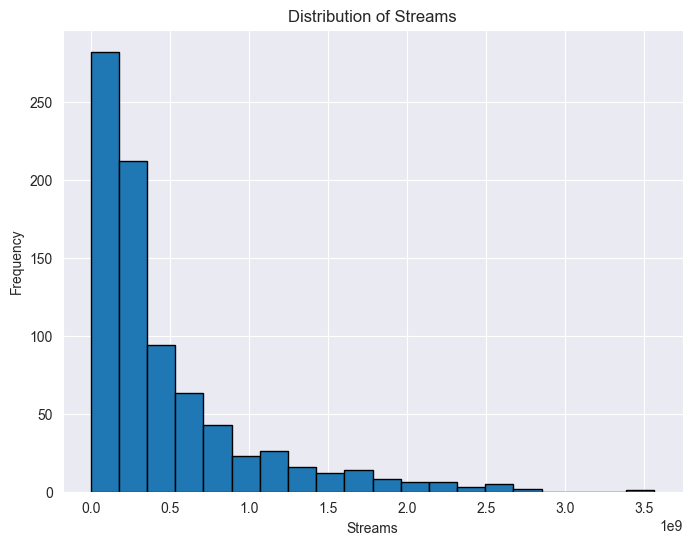

In [255]:
# Plot histogram for distribution of streams

plt.figure(figsize=(8, 6))
plt.hist(df['streams'], bins=20, edgecolor='black')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.title('Distribution of Streams')
plt.grid(True)
plt.show()

# Modelling

We will create a regression model as we are predicting continuous data.

We will be predicting the number of streams based on:
- "in_charts"
- "in_playlists"

It is important to limit the number of features used to prevent [Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)

In [256]:
x = df[["in_charts", "in_playlists"]]
y = df["streams"]
x.head()

,in_charts,in_playlists
0,420,641
1,188,1580
2,334,1582
3,319,8099
4,198,3304


Split data up into training and testing data.

In [257]:
from sklearn.model_selection import train_test_split

x1_train, x1_val, y1_train, y1_val = train_test_split(x, y, test_size=0.3, random_state=42)

In [258]:
from sklearn.metrics import mean_squared_error
import numpy as np

def evalulate_model(model, x_val, y_val, label):
    y_pred = model.predict(x_val)
    acc = model.score(x_val, y_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    print("--------------------")
    print("Results for {}".format(label))
    print("Accuracy/r^2 (Higher is better): {:.3f}".format(acc))
    print("mse (Lower is better): {:.3f}".format(mse))
    print("rmse (Lower is better): {:.3f}".format(rmse))

In [259]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

def try_models(x_train, x_val, y_train, y_val, label1, label2):
    print("Evalulating models comparing {} against {}".format(label1, label2))

    lr = LinearRegression()
    lr.fit(x_train, y_train)
    evalulate_model(lr, x_val, y_val, "Linear")

    tree = DecisionTreeRegressor()
    tree.fit(x_train, y_train)
    evalulate_model(tree, x_val, y_val, "Decision Tree")

    kn = KNeighborsRegressor()
    kn.fit(x_train, y_train)
    evalulate_model(kn, x_val, y_val, "K Nearest Neighbours")

    svm1 = SVR()
    svm1.fit(x_train, y_train)
    evalulate_model(svm1, x_val, y_val, "Support Vector")

    mlp = MLPRegressor(max_iter=1000)
    mlp.fit(x_train, y_train)
    evalulate_model(mlp, x_val, y_val, "Multi-layer perceptron")

    print("--------------------")

In [260]:
try_models(x1_train, x1_val, y1_train, y1_val, "streams", "in_models and in_playlists")

Evalulating models comparing streams against in_models and in_playlists
--------------------
Results for Linear
Accuracy/r^2 (Higher is better): 0.671
mse (Lower is better): 96961230918660736.000
rmse (Lower is better): 311385983.819
--------------------
Results for Decision Tree
Accuracy/r^2 (Higher is better): 0.402
mse (Lower is better): 176380654739130656.000
rmse (Lower is better): 419976969.296
--------------------
Results for K Nearest Neighbours
Accuracy/r^2 (Higher is better): 0.703
mse (Lower is better): 87495350869065952.000
rmse (Lower is better): 295796130.585
--------------------
Results for Support Vector
Accuracy/r^2 (Higher is better): -0.211
mse (Lower is better): 356872888974468032.000
rmse (Lower is better): 597388390.391
--------------------
Results for Multi-layer perceptron
Accuracy/r^2 (Higher is better): -0.810
mse (Lower is better): 533585819282002432.000
rmse (Lower is better): 730469588.198
--------------------


C:\Users\DiffuseHyperion\PycharmProjects\VJCxTP-Hackathon-24\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
